In [437]:
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np

from sklearn.datasets.samples_generator import make_blobs

X,y=make_blobs(n_samples=500,centers=2,n_features=2,cluster_std=5,random_state=1)
m=200

In [438]:
df=pd.DataFrame(dict(x=X[:,0],y=X[:,1],label=y))
df.head()

,x,y,label
0,-10.713691,1.211570,1
1,-5.916838,9.410897,0
2,-14.028604,-3.708040,1
3,9.293939,-5.075315,0
4,-4.652783,-5.002113,1


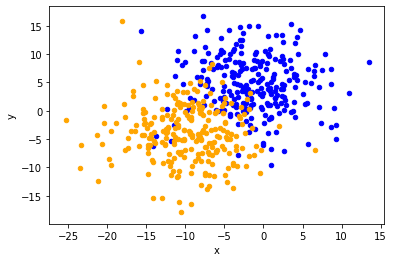

In [439]:
colors={0:"blue",1:"orange"}
fig,ax=pl.subplots()
grouped=df.groupby('label')
for key,group in grouped:
    group.plot(ax=ax,kind='scatter',x='x',y='y',color=colors[key])


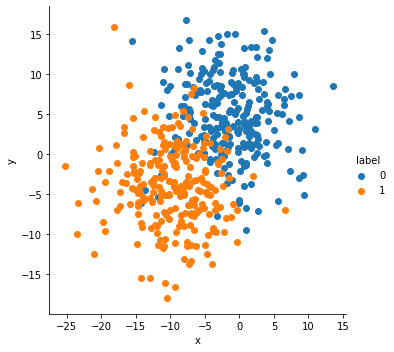

In [440]:
sns.FacetGrid(df,hue="label",height=5)\
        .map(pl.scatter,"x","y")\
        .add_legend()

In [441]:
def sigmoid(z):
    return 1/(1+np.exp(z))

In [442]:
def hx(w,X):
    z=np.array(w[0]+w[1]*np.array(X[:,0])+w[2]*np.array(X[:,1]))
    return sigmoid(z)


In [443]:
def cost(w,X,y):
    y_pred=hx(w,X)
    return -1*sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))


In [444]:
def grad(w,X,y):
    y_pred=hx(w,X)
    g=[0]*3
    g[0]=-1*sum(y*(1-y_pred)-(1-y)*y_pred)
    g[1]=-1*sum(y*(1-y_pred)*X[:,0]-(1-y)*y_pred*X[:,0])
    g[2]=-1*sum(y*(1-y_pred)*X[:,1]-(1-y)*y_pred*X[:,1])
    return g

In [445]:
def descent(w_new,w_old,lr):
    print(w_old)
    print(cost(w_old,X,y))
    j=0
    while True:
        w_old=w_new
        w0=w_old[0]-lr*grad(w_old,X,y)[0]
        w1=w_old[1]-lr*grad(w_old,X,y)[1]
        w2=w_old[2]-lr*grad(w_old,X,y)[2]
        w_new=[w0,w1,w2]
        if(w_new[0]-w_old[0])**2+(w_new[1]-w_old[1])**2+(w_new[2]-w_old[2])**2<pow(10,-6):
            return w_new
        if j>100:
            return w_new
        j+=1

In [446]:
w=[1,1,1]


In [447]:
W=descent(w,w,.0099)
print(W)

[1, 1, 1]
299.30164141349763
[57.67580541634438, -2268.0177630506687, -2122.814848820569]


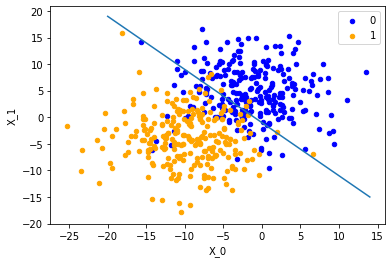

In [448]:

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-w[0]-w[1]*x)/w[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()